In [105]:
# Importing os and pandas
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# Checking that our file exists
if not os.path.exists("data/waterwise-plants.csv"):
    print("Couldn't find waterwise-plants.csv. Read data/README.md")
else:
    print("Done")

Done


In [106]:
# Importing the csv in pandas
df = pd.read_csv('data/waterwise-plants.csv', encoding='unicode_escape')        # unicode_escape necessary since waterwise-plants.csv contains 0xca
print(df.info(verbose=True))       # Looks like most of these are categorical
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Plant ID                4654 non-null   float64
 1   Plant Code              4654 non-null   object 
 2   Botanical Name          4655 non-null   object 
 3   Common Name             4654 non-null   object 
 4   Previous Name           573 non-null    object 
 5   Plant Type              4654 non-null   object 
 6   Water Needs             4654 non-null   object 
 7   Climate Zones           4654 non-null   object 
 8   Light Needs             4654 non-null   object 
 9   Soil Type               4654 non-null   object 
 10  Soil Additional         2130 non-null   object 
 11  Maintenance             4654 non-null   object 
 12  Abcission               4654 non-null   object 
 13  Height Ranges           4630 non-null   object 
 14  Spread Ranges           4594 non-null   

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Image,Image Location,Image Owner,Herb External Have,Herb Images change to,Notes,Why photo removed,Why plant removed,Actioned By,Date Actioned,Status
0,2.0,ABECHI,Abelia chinensis,Chinese Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,Yes,images/2_abelia_chinensis.jpg,Arno King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
1,3.0,ABEFLO,Abelia floribunda,Mexican Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,High,Evergreen,1 to 2m,1 to 2m,Pink,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
2,4.0,ABEGRA,Abelia x grandiflora,Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,Yes,images/4_abelia_x_grandiflora.jpg,Nursery and Garden Industry Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
3,5.0,ABEFRA,Abelia x grandiflora 'Francis Mason',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Yellow and green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,Yes,images/5_abelia_frances_mason.jpg,Nursery and Garden Industry Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
4,6.0,ABEGOL,Abelia x grandiflora 'Goldsport',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Yellow and green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
5,7.0,ABEESC,Abelmoschus esculentus,Okra,NaN,"Annual,Vegetable",2000 to 2500mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Annual,1 to 2m,0.5 to 1m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,No,Unknown,No,Unknown,Unknown,Yes,images/7_abelmoschus_esculentus.jpg,Arno King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
6,8.0,ABEMAN,Abelmoschus manihot,Abika,NaN,Vegetable,900 to 1400mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,Yes,images/8_abelmoschus_manihot.jpg,Arno King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
7,9.0,ABEPAL,Abelmoschus manihot 'Red Vein Palm Leaf',Palm Leaf Abika,NaN,Vegetable,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,Loam,High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
8,10.0,ABEMOS,Abelmoschus moschatus subsp. Tuberosus,Musk Mallow,NaN,Shrub,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",NaN,Medium,Semi-deciduous,0.5 to 1m,1 to 2m,Red,Dark green,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,Yes,images/10_abelmoschus_moschatus_tuberosus.jpg,Department of Environment and Resource Management,Sheldon Navie,NaN,NaN,NaN,NaN,NaN,NaN,Active
9,11.0,ABEMIS,Abelmoschus rugosus 'Mischief',Rose Musk Mallow,NaN,Shrub,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,0.5 to 1m,1 to 2m,Red,Dark green,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Yes,

In [107]:
# Looks like some of these columns aren't useful, let's filter them out.
df.drop(["Image", "Image Location", "Image Owner", "Herb External Have", "Herb Images change to ", "Why photo removed", "Why plant removed", "Actioned By", "Date Actioned"], axis=1, inplace=True)

# I don't like float NaNs
df = df.fillna('NaN')

print(df.info(verbose=True))       # Looks like most of these are categorical
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Plant ID              4663 non-null   object
 1   Plant Code            4663 non-null   object
 2   Botanical Name        4663 non-null   object
 3   Common Name           4663 non-null   object
 4   Previous Name         4663 non-null   object
 5   Plant Type            4663 non-null   object
 6   Water Needs           4663 non-null   object
 7   Climate Zones         4663 non-null   object
 8   Light Needs           4663 non-null   object
 9   Soil Type             4663 non-null   object
 10  Soil Additional       4663 non-null   object
 11  Maintenance           4663 non-null   object
 12  Abcission             4663 non-null   object
 13  Height Ranges         4663 non-null   object
 14  Spread Ranges         4663 non-null   object
 15  Flower colour         4663 non-null   

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Notes,Status
0,2.0,ABECHI,Abelia chinensis,Chinese Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
1,3.0,ABEFLO,Abelia floribunda,Mexican Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,High,Evergreen,1 to 2m,1 to 2m,Pink,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
2,4.0,ABEGRA,Abelia x grandiflora,Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Mid green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,NaN,Active
3,5.0,ABEFRA,Abelia x grandiflora 'Francis Mason',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Yellow and green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,NaN,Active
4,6.0,ABEGOL,Abelia x grandiflora 'Goldsport',Golden Abelia,NaN,Shrub,600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,1 to 2m,1 to 2m,White,Yellow and green,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Medium,Unknown,No,Unknown,Unknown,NaN,Active
5,7.0,ABEESC,Abelmoschus esculentus,Okra,NaN,"Annual,Vegetable",2000 to 2500mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Annual,1 to 2m,0.5 to 1m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,No,Unknown,No,Unknown,Unknown,NaN,Active
6,8.0,ABEMAN,Abelmoschus manihot,Abika,NaN,Vegetable,900 to 1400mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
7,9.0,ABEPAL,Abelmoschus manihot 'Red Vein Palm Leaf',Palm Leaf Abika,NaN,Vegetable,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,Loam,High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active
8,10.0,ABEMOS,Abelmoschus moschatus subsp. Tuberosus,Musk Mallow,NaN,Shrub,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",NaN,Medium,Semi-deciduous,0.5 to 1m,1 to 2m,Red,Dark green,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active
9,11.0,ABEMIS,Abelmoschus rugosus 'Mischief',Rose Musk Mallow,NaN,Shrub,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",NaN,Medium,Evergreen,0.5 to 1m,1 to 2m,Red,Dark green,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active


In [108]:
# We only care about edible plants
df_edible = df[df["Edible"] == "Yes"].copy()
df_edible.head(10)

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Notes,Status
5,7.0,ABEESC,Abelmoschus esculentus,Okra,NaN,"Annual,Vegetable",2000 to 2500mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Annual,1 to 2m,0.5 to 1m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,No,Unknown,No,Unknown,Unknown,NaN,Active
6,8.0,ABEMAN,Abelmoschus manihot,Abika,NaN,Vegetable,900 to 1400mm,"Humid Tropical,Humid Subtropical",Sun,"Sand,Loam,Clay",High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
7,9.0,ABEPAL,Abelmoschus manihot 'Red Vein Palm Leaf',Palm Leaf Abika,NaN,Vegetable,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Sun,Loam,High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active
72,74.0,ACCSEL,Acca sellowiana,"Feijoa, Pineapple Guava",Feijoa sellowiana,"Fruit,Tree",600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam,Clay",Well drained,Low,Evergreen,1 to 2m,1 to 2m,Red,Grey-green,Unknown,Unknown,Yes,Yes,Yes,Yes,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
92,94.0,ACRACI,Acronychia acidula,Lemon Aspen,NaN,Small Tree,1400 to 2000mm,"Humid Tropical,Humid Subtropical","Sun,Semi-shade",Loam,Well drained,Low,Evergreen,5 to 8m,3 to 5m,Cream,Mid green,Yes,Unknown,Yes,Yes,Fruit,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active
95,97.0,ACTCHI,Actinidia chinensis,Kiwifruit,NaN,"Climber,Fruit",1400 to 2000mm,Temperate,Sun,Loam,Well drained,High,Semi-deciduous,2 to 5m,3 to 5m,White,Mid green,Unknown,Unknown,Yes,Yes,Fruit,No,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
141,143.0,AEGMAR,Aegle marmelos,Bael Fruit,NaN,"Fruit,Tree",600 to 900mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,"Sand,Loam",Well drained,Low,Evergreen,8 to 15m,3 to 5m,White,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active
170,173.0,AGAFOE,Agastache foeniculare,Giant Hyssop,NaN,"Herb,Perennial",900 to 1400mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam",Well drained,Medium,Evergreen,0.5 to 1m,0.5 to 1m,Blue,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Light,Unknown,No,Unknown,Unknown,NaN,Active
171,174.0,AGAMEX,Agastache mexicana,Toronjil Morado,NaN,"Herb,Perennial",900 to 1400mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,"Sand,Loam",Well drained,Medium,Evergreen,0.5 to 1m,0.5 to 1m,Orange,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Light,Unknown,No,Unknown,Unknown,NaN,Active
264,269.0,ALLAMP,Allium porrum,Leek,Allium ampeloprasum,Vegetable,1400 to 2000mm,"Humid Subtropical,Dry Subtropical,Temperate",Sun,Loam,High organic matter,High,Evergreen,Under 0.5m,Under 0.5m,White,Grey-green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Medium,No,No,Unknown,Unknown,NaN,Active


In [109]:
# Let's take a closer look at the rain requirements
df_edible["Water Needs"].drop_duplicates().values

array(['2000 to 2500mm', '900 to 1400mm', '1400 to 2000mm',
       '600 to 900mm', '300 to 600mm', '2500mm or more',
       'aquatic environment'], dtype=object)

[Text(0, 0, '300 to 600mm'),
 Text(1, 0, '600 to 900mm'),
 Text(2, 0, '900 to 1400mm'),
 Text(3, 0, '1400 to 2000mm'),
 Text(4, 0, '2000 to 2500mm'),
 Text(5, 0, '2500mm or more'),
 Text(6, 0, 'aquatic environment')]

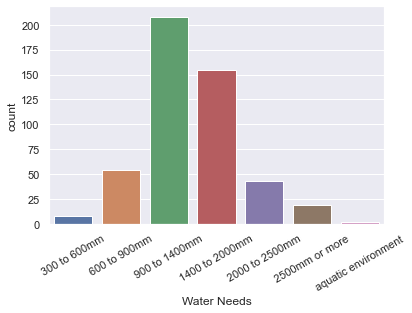

In [110]:
#water needs in ascending order:
#300 to 600
#600 to 900
#900 to 1400
#1400 to 2000
#2000 to 2500
#2500 +
#aquatic enviroment

sorted_rain_needs = ["300 to 600mm","600 to 900mm","900 to 1400mm","1400 to 2000mm","2000 to 2500mm","2500mm or more","aquatic environment"]

#distribution of these water needs:
dg = sns.countplot(data=df_edible, x="Water Needs", order=sorted_rain_needs)
dg.set_xticklabels(dg.get_xticklabels(),rotation=30)

In [111]:
# Now let's take a quick look at height and spread ranges, and chart water usage by it.
print(f"Height Ranges: {df_edible['Height Ranges'].drop_duplicates().values}")
print(f"Spread Ranges: {df_edible['Spread Ranges'].drop_duplicates().values}")

sorted_height_ranges = ['Under 0.5m','0.5 to 1m','1 to 2m','2 to 5m','5 to 8m','8 to 15m','Over 15m']
sorted_spread_ranges = ['Under 0.5m','0.5 to 1m','1 to 2m','2 to 3m','3 to 5m','5 to 10m', "NaN"]

Height Ranges: ['1 to 2m' '5 to 8m' '2 to 5m' '8 to 15m' '0.5 to 1m' 'Under 0.5m'
 'Over 15m']
Spread Ranges: ['0.5 to 1m' '1 to 2m' '3 to 5m' 'Under 0.5m' '5 to 10m' '2 to 3m' 'NaN']


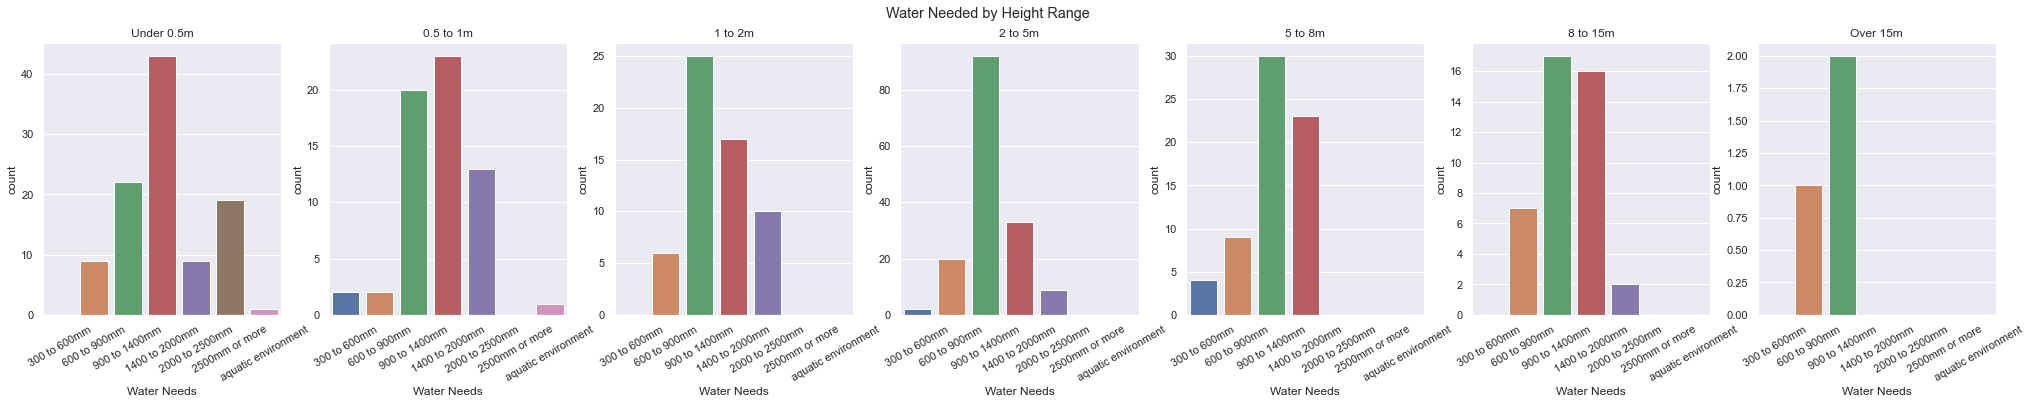

In [112]:
# Plotting by height range
fig, axes = plt.subplots(1, len(sorted_height_ranges), figsize=(5*len(sorted_height_ranges),5))
fig.suptitle("Water Needed by Height Range")

for i, height_range in enumerate(sorted_height_ranges):
    axes[i].set_title(height_range)
    dg = sns.countplot(ax = axes[i], data=df_edible[df_edible["Height Ranges"] == height_range], x="Water Needs", order=sorted_rain_needs)
    dg.set_xticklabels(dg.get_xticklabels(),rotation=30)    

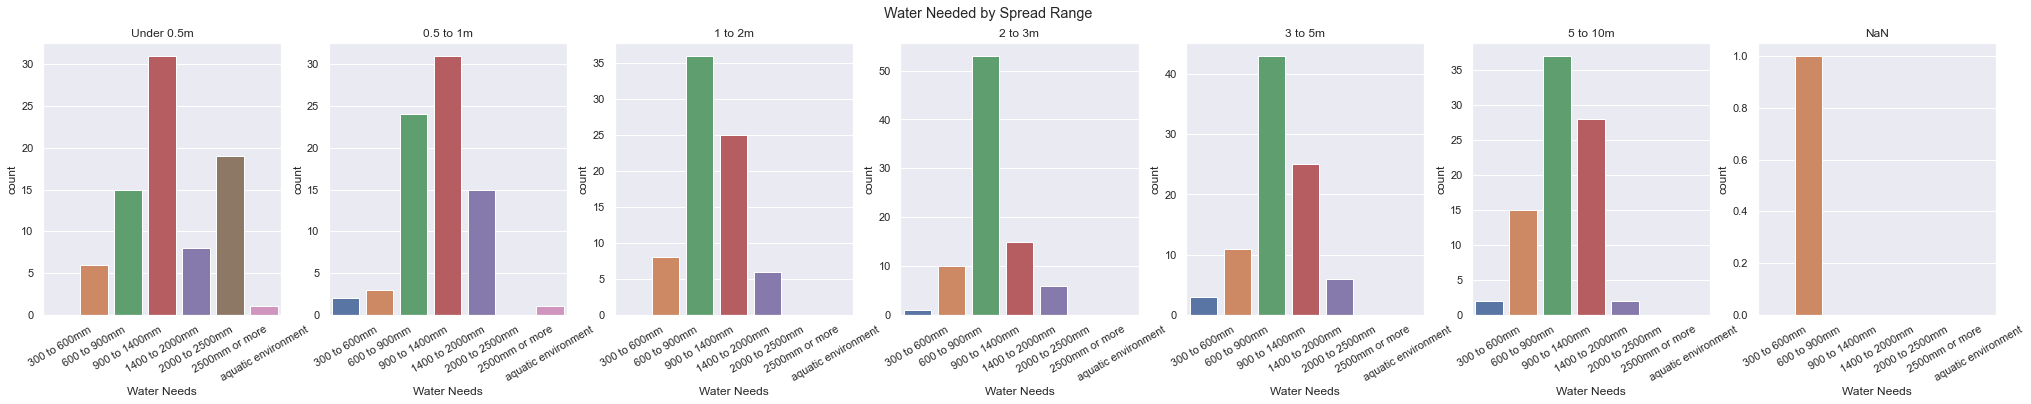

In [113]:
# Plotting by spread range
fig, axes = plt.subplots(1, len(sorted_spread_ranges), figsize=(5*len(sorted_spread_ranges),5))
fig.suptitle("Water Needed by Spread Range")

for i, spread_range in enumerate(sorted_spread_ranges):
    axes[i].set_title(spread_range)
    dg = sns.countplot(ax = axes[i], data=df_edible[df_edible["Spread Ranges"] == spread_range], x="Water Needs", order=sorted_rain_needs)
    dg.set_xticklabels(dg.get_xticklabels(),rotation=30)    

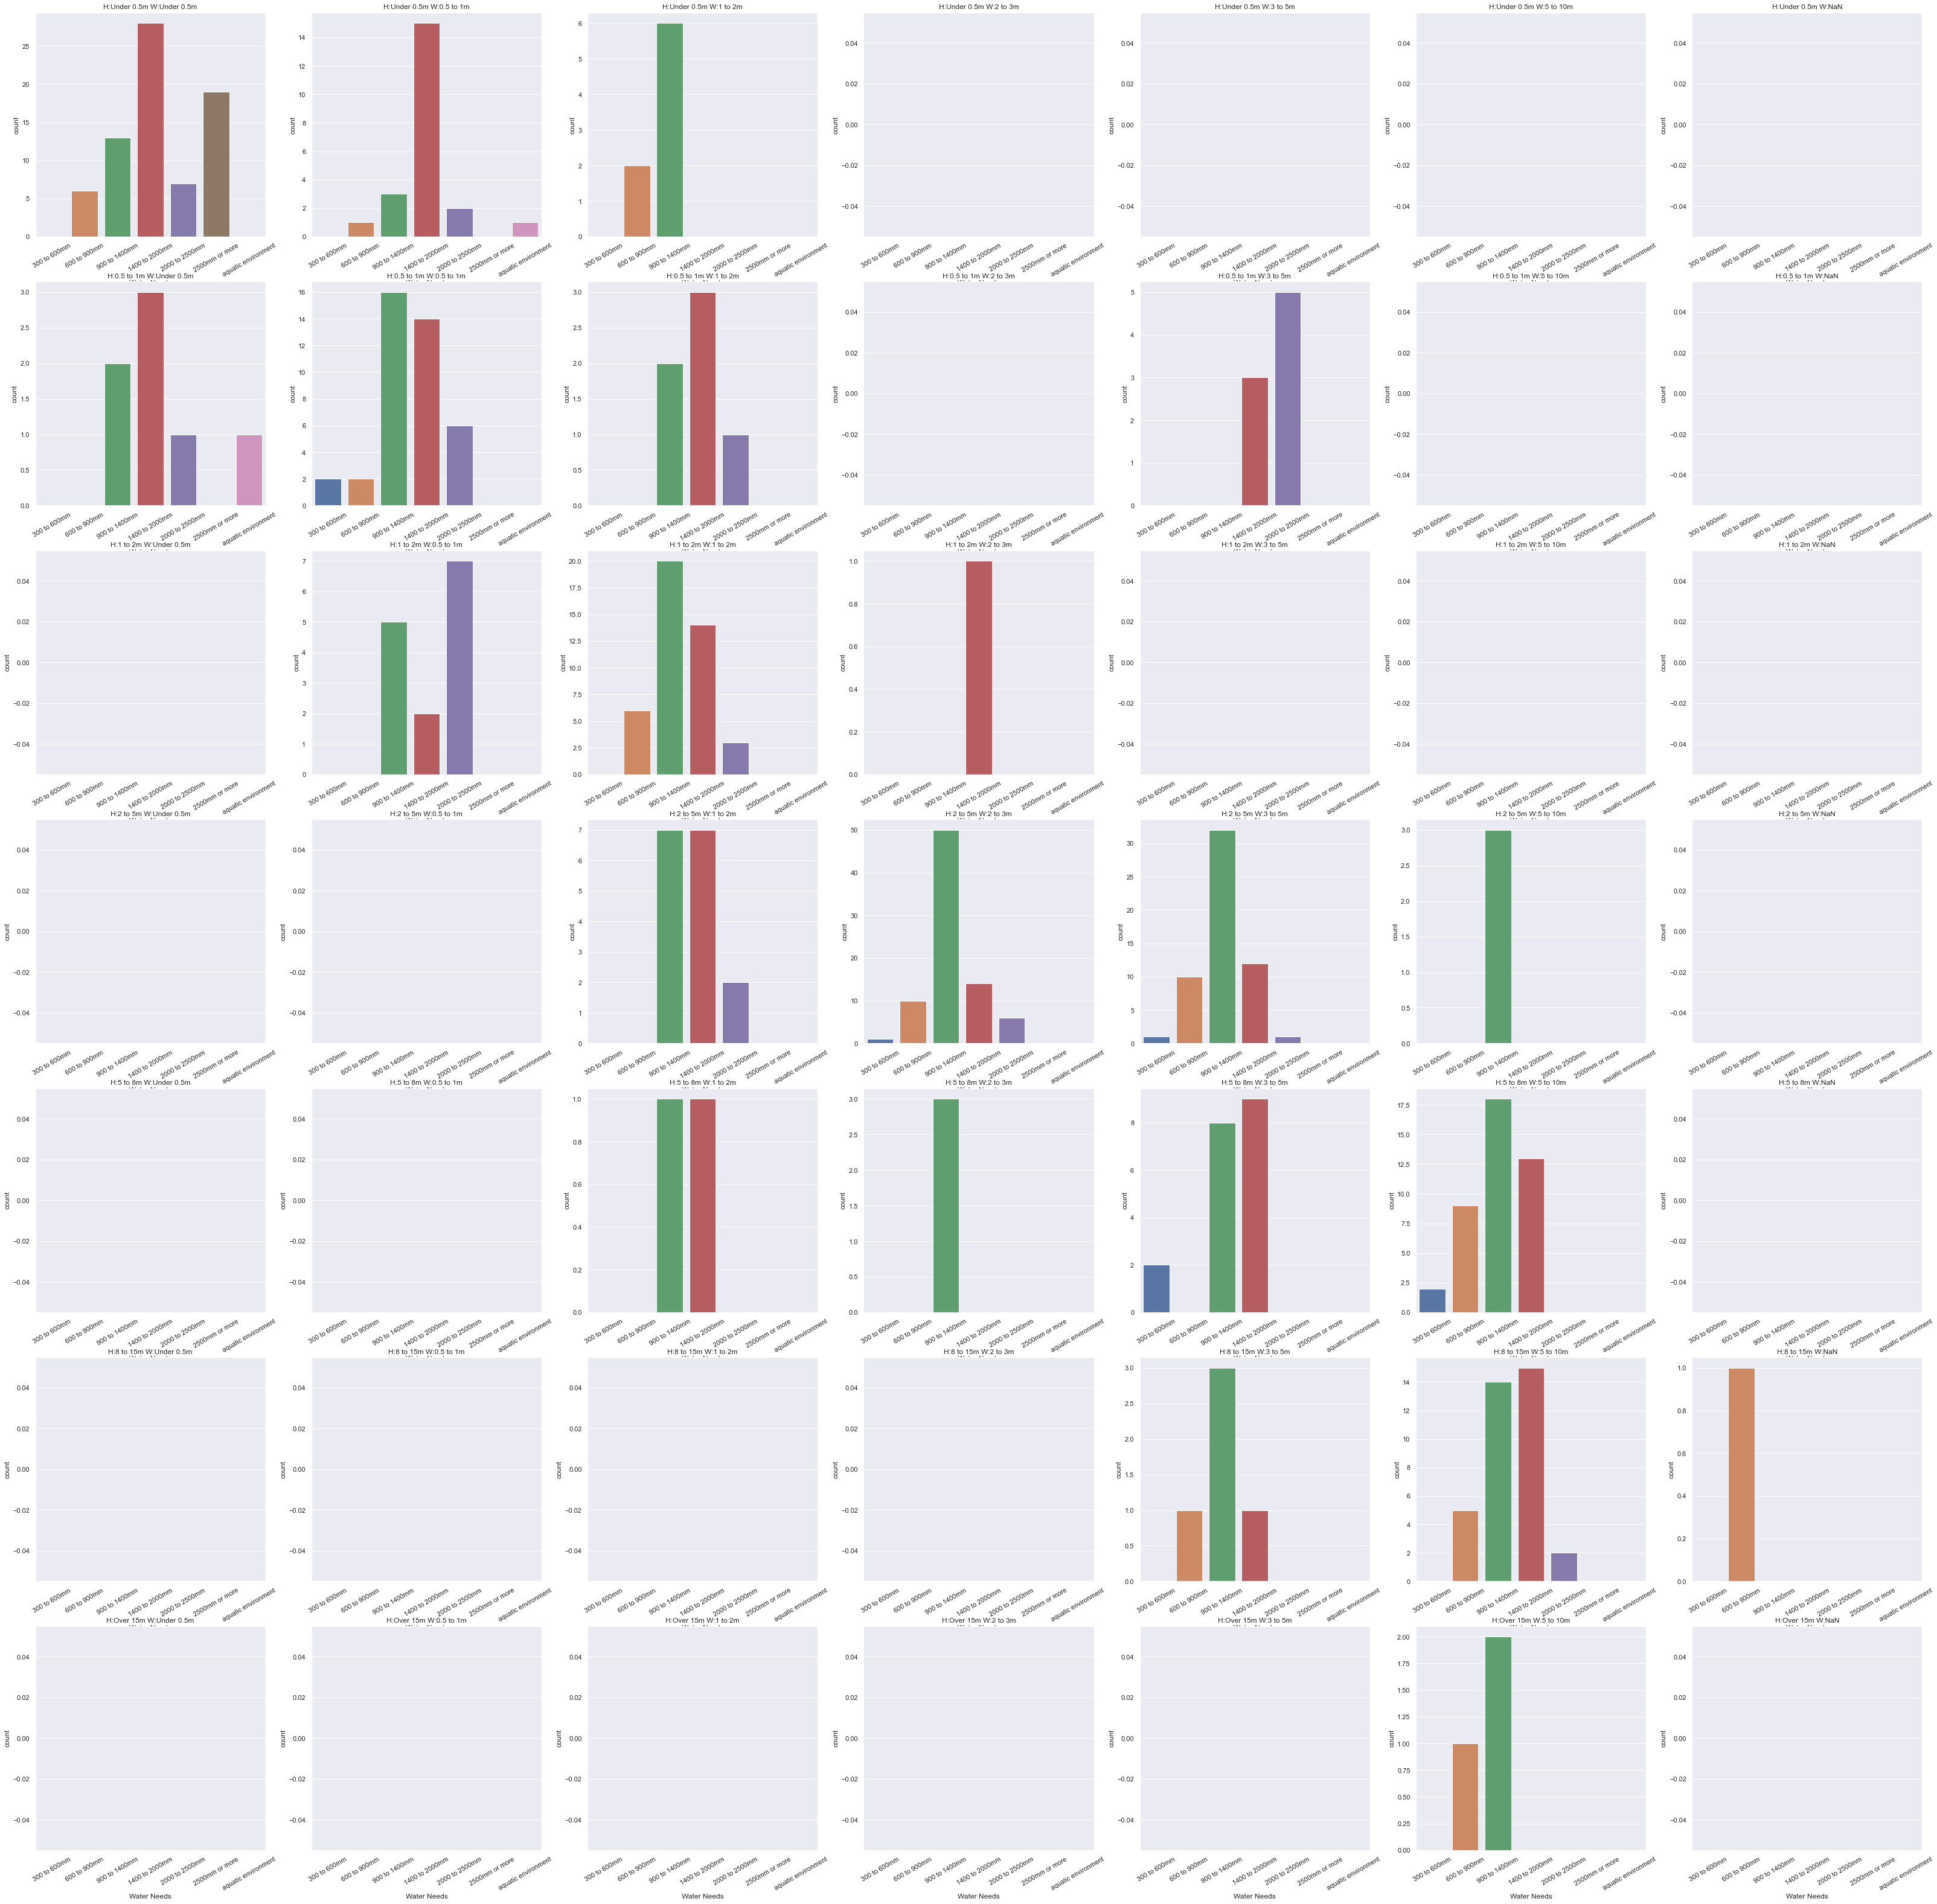

In [114]:
# And finally, by both
fig, axes = plt.subplots(len(sorted_spread_ranges), len(sorted_height_ranges), figsize=(8*len(sorted_height_ranges),8*len(sorted_spread_ranges)))
for x, height_range in enumerate(sorted_height_ranges):
    for y, spread_range in enumerate(sorted_spread_ranges):
        axes[x][y].set_title(f"H:{height_range} W:{spread_range}")
        dg = sns.countplot(ax = axes[x][y], data=df_edible[(df_edible["Spread Ranges"] == spread_range) & (df_edible["Height Ranges"] == height_range)], x="Water Needs", order=sorted_rain_needs)
        dg.set_xticklabels(dg.get_xticklabels(),rotation=30)

In [115]:
# What plants are small but super wide?
df_edible[(df_edible["Spread Ranges"] == '1 to 2m') & (df_edible["Height Ranges"] == "Under 0.5m")].head(10)

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Light Needs,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Notes,Status
2470,2519.0,IPOBAT,Ipomoea batatas,Sweet Potato,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
2471,2520.0,IPOAUR,Ipomoea batatas 'Margarita',Golden Sweet Potato,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Yellow and green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
2472,2521.0,IPOISL,Ipomoea batatas 'Island Kumara',Island Kumara,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
2473,2522.0,IPORED,Ipomaea batatas 'Sweet Caroline Sweetheart Red',Autumn Leaf Sweet Potato,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Red,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
2474,2523.0,IPOPUR,Ipomaea batatas 'Sweet Caroline Sweetheart Pur...,Purple Leaf Sweet Potato,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Purple,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
2475,2524.0,IPOPAL,Ipomaea batatas 'Sweet Caroline Sweetheart Lig...,Pale Green Sweet Potato,NaN,"Perennial,Vegetable",900 to 1400mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...",Sun,Loam,High organic matter,Medium,Evergreen,Under 0.5m,1 to 2m,Pink,Yellow and green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
3462,3525.0,PLEAMB,Plectranthus amboinensis,Allherb,NaN,"Herb,Perennial",600 to 900mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...","Sun,Semi-shade","Sand,Loam,Clay",NaN,Low,Evergreen,Under 0.5m,1 to 2m,White,Light green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active
3463,3526.0,PLEVAR,Plectranthus amboinensis 'Variegata',Variegated Allherb,NaN,"Herb,Perennial",600 to 900mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...","Sun,Semi-shade","Sand,Loam,Clay",NaN,Low,Evergreen,Under 0.5m,1 to 2m,White,Light green and silver,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,No,No,Unknown,Unknown,NaN,Active


In [116]:
# Let's look at the light levels
df_edible["Light Needs"].drop_duplicates().values

array(['Sun', 'Sun,Semi-shade', 'Semi-shade', 'Shade,Semi-shade',
       'Sun,Shade,Semi-shade', 'Shade'], dtype=object)

In [120]:
# Let's clean this up a bit, "Sun " should equal "Sun", and we should encode these as one-hot vectors
df_edible["Light Needs"] = df_edible["Light Needs"].replace("Sun ", "Sun")
df_edible["Light - Tolerates Sun"] = df_edible["Light Needs"].str.contains(".*Sun.*", regex=True)
df_edible["Light - Tolerates Semi-shade"] = df_edible["Light Needs"].str.contains(".*Semi-shade.*", regex=True)
df_edible["Light - Tolerates Shade"] = df_edible["Light Needs"].str.contains(".*Shade.*", regex=True)          # Thankfully Shade here starts in a capital S
df_edible.drop("Light Needs", axis=1, inplace=True)
df_edible.head(10)

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Notes,Status,Light - Tolerates Sun,Light - Tolerates Semi-shade,Light - Tolerates Shade
5,7.0,ABEESC,Abelmoschus esculentus,Okra,NaN,"Annual,Vegetable",2000 to 2500mm,"Humid Tropical,Humid Subtropical","Sand,Loam,Clay",High organic matter,High,Annual,1 to 2m,0.5 to 1m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,No,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
6,8.0,ABEMAN,Abelmoschus manihot,Abika,NaN,Vegetable,900 to 1400mm,"Humid Tropical,Humid Subtropical","Sand,Loam,Clay",High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
7,9.0,ABEPAL,Abelmoschus manihot 'Red Vein Palm Leaf',Palm Leaf Abika,NaN,Vegetable,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Loam,High organic matter,High,Evergreen,1 to 2m,1 to 2m,Yellow,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active,True,False,False
72,74.0,ACCSEL,Acca sellowiana,"Feijoa, Pineapple Guava",Feijoa sellowiana,"Fruit,Tree",600 to 900mm,"Humid Subtropical,Dry Subtropical,Temperate","Sand,Loam,Clay",Well drained,Low,Evergreen,1 to 2m,1 to 2m,Red,Grey-green,Unknown,Unknown,Yes,Yes,Yes,Yes,Unknown,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
92,94.0,ACRACI,Acronychia acidula,Lemon Aspen,NaN,Small Tree,1400 to 2000mm,"Humid Tropical,Humid Subtropical",Loam,Well drained,Low,Evergreen,5 to 8m,3 to 5m,Cream,Mid green,Yes,Unknown,Yes,Yes,Fruit,Unknown,Unknown,Unknown,Yes,Unknown,Unknown,NaN,Active,True,True,False
95,97.0,ACTCHI,Actinidia chinensis,Kiwifruit,NaN,"Climber,Fruit",1400 to 2000mm,Temperate,Loam,Well drained,High,Semi-deciduous,2 to 5m,3 to 5m,White,Mid green,Unknown,Unknown,Yes,Yes,Fruit,No,Unknown,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
141,143.0,AEGMAR,Aegle marmelos,Bael Fruit,NaN,"Fruit,Tree",600 to 900mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...","Sand,Loam",Well drained,Low,Evergreen,8 to 15m,3 to 5m,White,Dark green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
170,173.0,AGAFOE,Agastache foeniculare,Giant Hyssop,NaN,"Herb,Perennial",900 to 1400mm,"Humid Subtropical,Dry Subtropical,Temperate","Sand,Loam",Well drained,Medium,Evergreen,0.5 to 1m,0.5 to 1m,Blue,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Light,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
171,174.0,AGAMEX,Agastache mexicana,Toronjil Morado,NaN,"Herb,Perennial",900 to 1400mm,"Humid Subtropical,Dry Subtropical,Temperate","Sand,Loam",Well drained,Medium,Evergreen,0.5 to 1m,0.5 to 1m,Orange,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Light,Unknown,No,Unknown,Unknown,NaN,Active,True,False,False
264,269.0,ALLAMP,Allium porrum,Leek,Allium ampeloprasum,Vegetable,1400 to 2000mm,"Humid Subtropical,Dry Subtropical,Temperate",Loam,High organic matter,High,Evergreen,Under 0.5m,Under 0.5m,White,Grey-green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Medium,No,No,Unknown,Unknown,NaN,Active,True,False,False


[Text(0, 0, '300 to 600mm'),
 Text(1, 0, '600 to 900mm'),
 Text(2, 0, '900 to 1400mm'),
 Text(3, 0, '1400 to 2000mm'),
 Text(4, 0, '2000 to 2500mm'),
 Text(5, 0, '2500mm or more'),
 Text(6, 0, 'aquatic environment')]

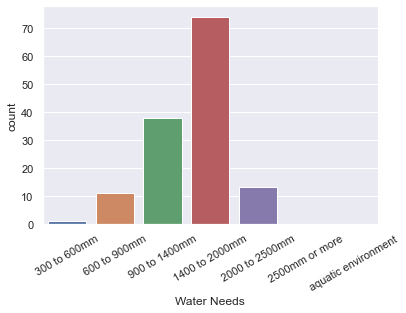

In [126]:
# What about small plants that like shade?
dg = sns.countplot(data=df_edible[df_edible["Light - Tolerates Semi-shade"] | df_edible["Light - Tolerates Shade"]], x="Water Needs", order=sorted_rain_needs)
dg.set_xticklabels(dg.get_xticklabels(),rotation=30)

In [128]:
# What's that 300-600mm outlier?
df_edible[(df_edible["Light - Tolerates Semi-shade"] | df_edible["Light - Tolerates Shade"]) & (df_edible["Water Needs"] == "300 to 600mm")]    # I think this might not be edible? https://www.data.qld.gov.au/dataset/waterwise-plants/comments#comment_b4f7a4f6-7e4c-461d-ba85-20c167ad2ce4

,Plant ID,Plant Code,Botanical Name,Common Name,Previous Name,Plant Type,Water Needs,Climate Zones,Soil Type,Soil Additional,Maintenance,Abcission,Height Ranges,Spread Ranges,Flower colour,Foliage Colour,Perfume,Aromatic,Edible,Bird Attracting,Bird Attractant,Bore water Tolerance,Frost Tolerance,Greywater Tolerance,Native,Butterfly Attracting,Butterfly Type,Notes,Status,Light - Tolerates Sun,Light - Tolerates Semi-shade,Light - Tolerates Shade
1731,1755.0,DISLEP,Disocactus flagelliformis 'Leptopus',Rat's Tail Cactus,Aporocactus leptoplus,Succulent,300 to 600mm,"Humid Tropical,Dry Tropical,Humid Subtropical,...","Sand,Loam",Well drained,Low,Evergreen,0.5 to 1m,0.5 to 1m,Pink,Mid green,Unknown,Unknown,Yes,Unknown,NaN,Unknown,Unknown,Unknown,No,Unknown,Unknown,NaN,Reinstated,True,True,False


In [ ]:
#sort into tables
